In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")


# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 31st, 2022 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Challenging) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Challenging) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Challenging) [Your takeaway from the course](#15)

### Final results: The RMSE(root mean square error) on test data is 1.1943, which means the prediction is on average 1.1943 away from the true value.

## Instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://ubc-cs.github.io/cpsc330-2023W1/docs/homework_instructions.html).

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.
- The maximum group size is 4.
- Use group work as an opportunity to collaborate and learn new things from each other.
- Be respectful to each other and make sure you understand all the concepts in the assignment well.
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


**When you are ready to submit your assignment do the following:**

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file.
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

## Imports

In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import pandas as pd
from sklearn.compose import (
    ColumnTransformer,
    TransformedTargetRegressor,
    make_column_transformer,
)
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

<!-- BEGIN QUESTION -->



<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this assignment we'll be exploring a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset. In this assignment we'll try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on. You can find an explaination of the features [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit).  Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_In this data set, we have a detailed information about the post in the airbnb including 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'. Our goal is to predict the 'review_per_month' based on the information from other 15 columns._

_However, I found the target 'reviews_per_month' are missing in 10052/48895 data points. But I notice that they are missing because the total number of review is 0. So I will impute those missing value as 0 later._

_'id' and 'host_id' looks not related to 'review_per_month'. I may need to drop it._
_'neighborhood_group' like the groups of 'neighbourhood', I can use 'neighborhood_group' and I will drop 'neighbourhood'._

In [3]:
data = pd.read_csv('AB_NYC_2019.csv')


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

_Note: limited by our laptop performance, we enlarge the test size to 50% rather than 30%_

In [4]:
train_df, test_df = train_test_split(data, test_size = 0.5, random_state = 123)
print(train_df.shape[0])
X_train, y_train = train_df.drop(columns = 'reviews_per_month'), train_df['reviews_per_month']
print(test_df.shape[0])
X_test, y_test = test_df.drop(columns = 'reviews_per_month'), test_df['reviews_per_month']
X_test.describe(include='all')


24447
24448


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
count,2.444800e+04,24441,2.444800e+04,24436,24448,24448,24448.000000,24448.000000,24448,24448.000000,24448.000000,24448.000000,19322,24448.000000,24448.000000
unique,NaN,24130,NaN,7395,5,214,NaN,NaN,3,NaN,NaN,NaN,1568,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN
freq,NaN,12,NaN,214,10883,1970,NaN,NaN,12627,NaN,NaN,NaN,717,NaN,NaN
mean,1.917626e+07,NaN,6.839011e+07,NaN,NaN,NaN,40.728797,-73.952308,NaN,154.477708,6.883712,23.270329,NaN,7.376145,113.084874
std,1.093446e+07,NaN,7.893215e+07,NaN,NaN,NaN,0.054388,0.046035,NaN,246.636854,17.908665,44.722061,NaN,33.761381,131.753086
min,2.595000e+03,NaN,2.571000e+03,NaN,NaN,NaN,40.499790,-74.240840,NaN,0.000000,1.000000,0.000000,NaN,1.000000,0.000000
25%,9.672933e+06,NaN,7.858210e+06,NaN,NaN,NaN,40.690170,-73.983130,NaN,69.000000,1.000000,1.000000,NaN,1.000000,0.000000
50%,1.989422e+07,NaN,3.136300e+07,NaN,NaN,NaN,40.723090,-73.955880,NaN,105.000000,2.000000,5.000000,NaN,1.000000,45.000000
75%,2.918193e+07,NaN,1.095329e+08,NaN,NaN,NaN,40.762990,-73.936225,NaN,179.000000,5.000000,24.000000,NaN,2.000000,228.000000


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

- 1. Perform exploratory data analysis on the train set as detailed in the code
- 2. describe() and info() for summary statistics as detailed below. bar plot and histogram for visualization as detailed below
- 3. Observations are described below the figures
- 4. In this case of regression problem, we would like to choose root_mean_squared_error ('negative_root_mean_squared_error') as the scoring metric. The root mean squared error indicate the average error of the model to predict the target value. The lower the better (higher negative_root_mean_squared_error, better prediction).


In [5]:
X_train.describe(include = 'all')
# We use describe() to display the statistic information of each feature and target.
# For numeric feature: It will output the mean/std/min/max/interquatile  and the count of non-NULL values
# For categorical feature: it will output the number of categories and the most frequent one.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
count,2.444700e+04,24438,2.444700e+04,24438,24447,24447,24447.000000,24447.000000,24447,24447.000000,24447.000000,24447.000000,19521,24447.000000,24447.000000
unique,NaN,24131,NaN,7478,5,216,NaN,NaN,3,NaN,NaN,NaN,1581,NaN,NaN
top,NaN,Home away from home,NaN,David,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN
freq,NaN,10,NaN,208,10778,1950,NaN,NaN,12782,NaN,NaN,NaN,696,NaN,NaN
mean,1.885802e+07,NaN,6.684988e+07,NaN,NaN,NaN,40.729101,-73.952031,NaN,150.963595,7.176218,23.278603,NaN,6.911809,112.477768
std,1.102947e+07,NaN,7.828249e+07,NaN,NaN,NaN,0.054673,0.046279,NaN,233.483122,22.817176,44.379348,NaN,32.122275,131.493350
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.506410,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,1.000000,0.000000
25%,9.275326e+06,NaN,7.737249e+06,NaN,NaN,NaN,40.690030,-73.983030,NaN,69.000000,1.000000,1.000000,NaN,1.000000,0.000000
50%,1.941033e+07,NaN,3.028359e+07,NaN,NaN,NaN,40.723040,-73.955510,NaN,106.000000,3.000000,5.000000,NaN,1.000000,44.000000
75%,2.912663e+07,NaN,1.056545e+08,NaN,NaN,NaN,40.763280,-73.936335,NaN,175.000000,5.000000,23.000000,NaN,2.000000,226.000000


In [6]:

# I used info() to check the number of missing values in each feature and the data type of each features (also the target).
# df = pd.DataFrame(X_train.info())
# Assuming X_train is your DataFrame
info_dict = {
    'Column': X_train.columns,
    'Non-Null Count': X_train.count(),
    'Dtype': X_train.dtypes
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(info_dict)
df.reset_index(drop=True, inplace=True) 
df

,Column,Non-Null Count,Dtype
0,id,24447,int64
1,name,24438,object
2,host_id,24447,int64
3,host_name,24438,object
4,neighbourhood_group,24447,object
5,neighbourhood,24447,object
6,latitude,24447,float64
7,longitude,24447,float64
8,room_type,24447,object
9,price,24447,int64


In [7]:
import pandas as pd

# Assuming 'df' is your DataFrame containing information about columns, non-null counts, and data types

# Grouping the DataFrame by 'Dtype' column and creating separate DataFrames for each group
grouped_dtypes = df.groupby('Dtype')

# Dictionary to store separate DataFrames for each Dtype group
dtype_tables = {}

# Creating separate DataFrames for each Dtype group
for dtype, group in grouped_dtypes:
    dtype_tables[dtype] = group.drop(columns='Dtype').reset_index(drop=True)

# Accessing and displaying the separate tables based on Dtype
for dtype, table in dtype_tables.items():
    styled_table = table.style.background_gradient(cmap='YlGn', subset=['Non-Null Count'])
    print(f"Table for Dtype: {dtype}")
    display(styled_table)
    print("\n")


Table for Dtype: int64


,Column,Non-Null Count
0,id,24447
1,host_id,24447
2,price,24447
3,minimum_nights,24447
4,number_of_reviews,24447
5,calculated_host_listings_count,24447
6,availability_365,24447




Table for Dtype: float64


,Column,Non-Null Count
0,latitude,24447
1,longitude,24447




Table for Dtype: object


,Column,Non-Null Count
0,name,24438
1,host_name,24438
2,neighbourhood_group,24447
3,neighbourhood,24447
4,room_type,24447
5,last_review,19521


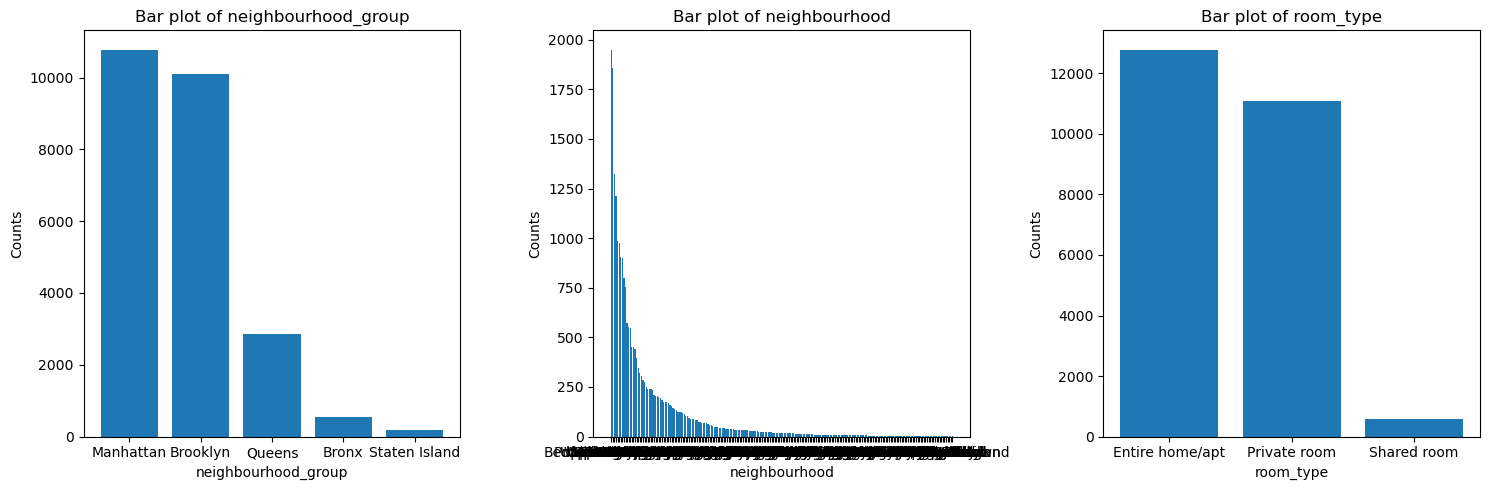

In [8]:
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
fig, axs = plt.subplots(1, len(categorical_features), figsize=(15, 5))  # Create subplots

for i, catego_feat in enumerate(categorical_features):
    summar = X_train[catego_feat].value_counts()
    axs[i].bar(summar.index, summar)
    axs[i].set_xlabel(catego_feat)
    axs[i].set_ylabel('Counts')
    axs[i].set_title('Bar plot of ' + catego_feat)

plt.tight_layout()  # Adjust layout
plt.show()


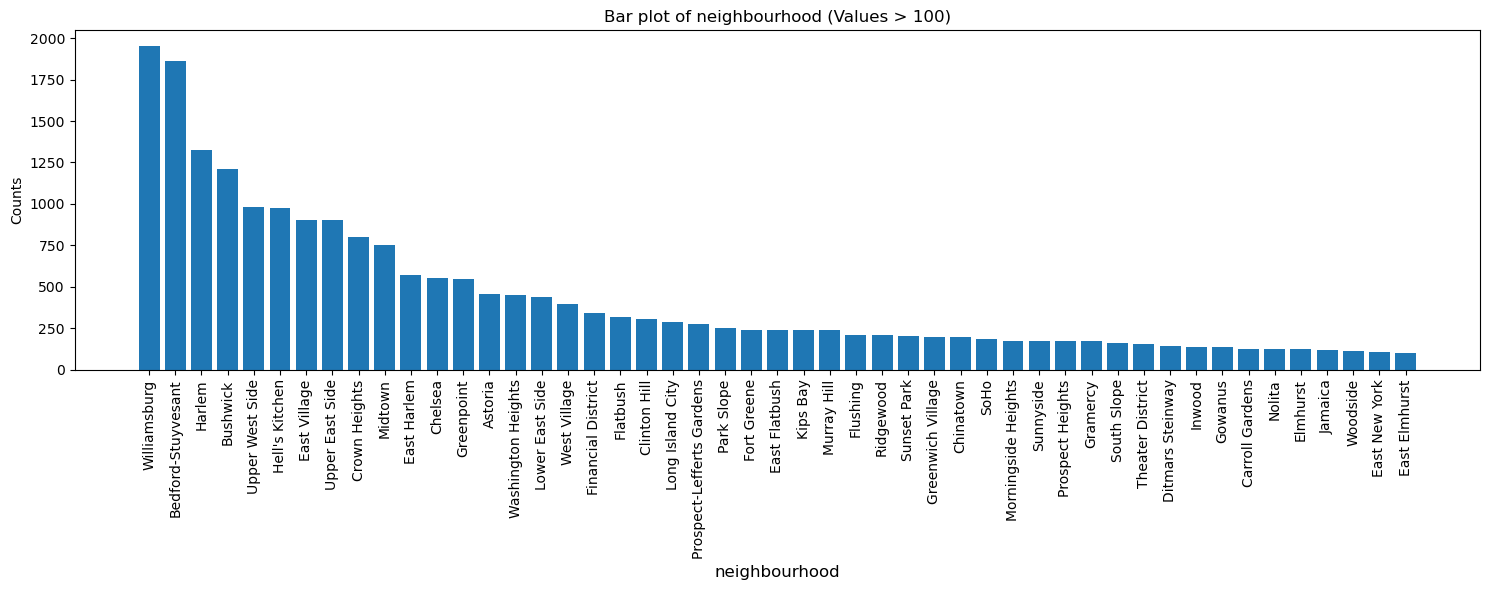

In [9]:
import matplotlib.pyplot as plt

categorical_features = ['neighbourhood']
plt.figure(figsize=(15, 6))  # Set the figure size outside the loop

for catego_feat in categorical_features:
    summar = X_train[catego_feat].value_counts()

    # Filter data to include only values greater than 1
    summar_filtered = summar[summar > 100]

    plt.bar(summar_filtered.index, summar_filtered)
    plt.xlabel(catego_feat, fontsize=12)
    plt.xticks(rotation='vertical')  # Rotate x-labels vertically
    plt.ylabel('Counts')
    plt.title('Bar plot of ' + catego_feat + ' (Values > 100)')

plt.tight_layout()  # Adjust l


_For neighbourhood_group, there are 5 groups. Most of airbnbs are in Manhattan and Brooklyn._

_For neighbourhood, there are a lot of categories._

_For room_type, there are 3 types. Most are Entire home/apt and Private room._

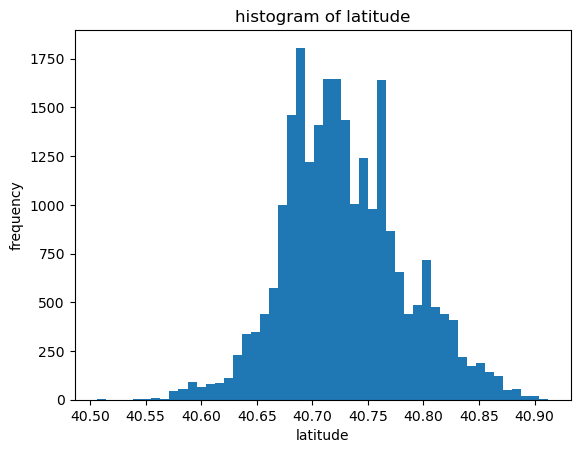

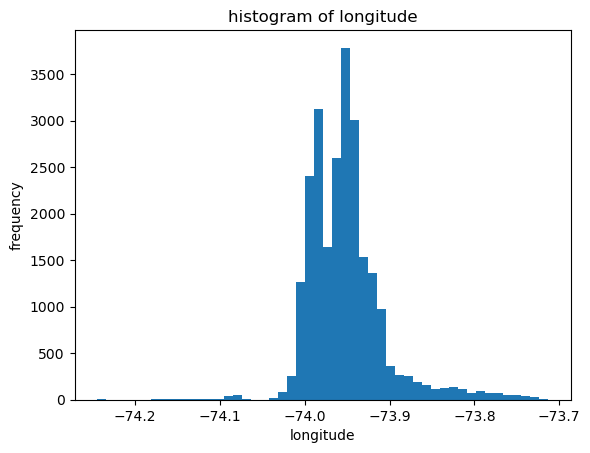

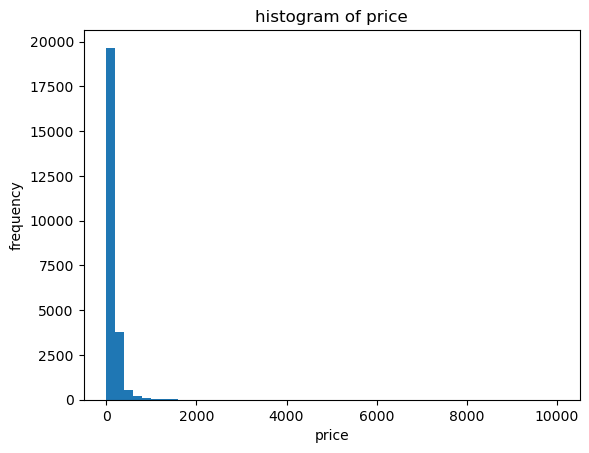

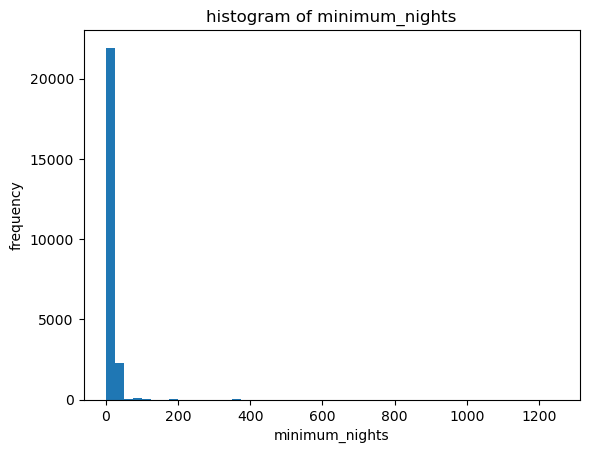

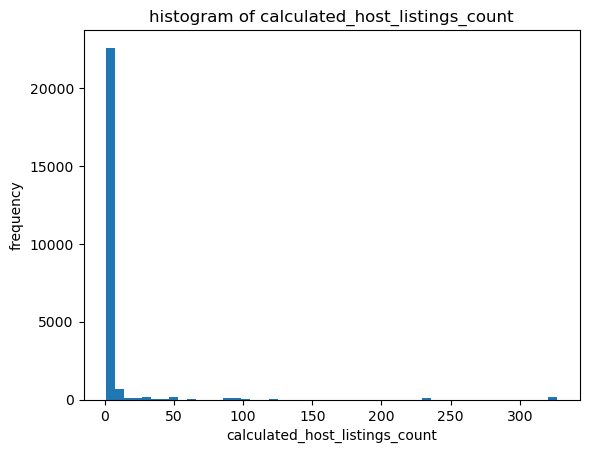

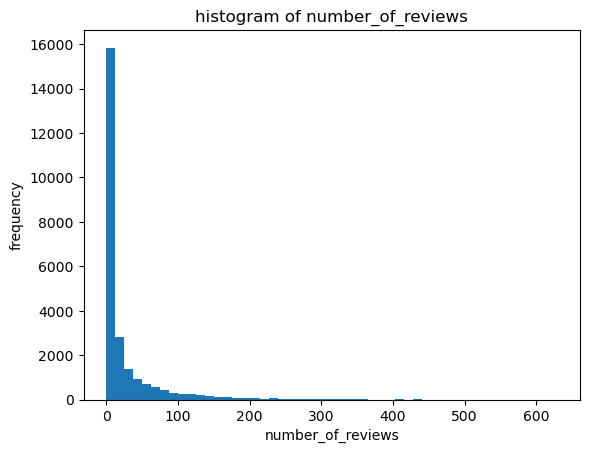

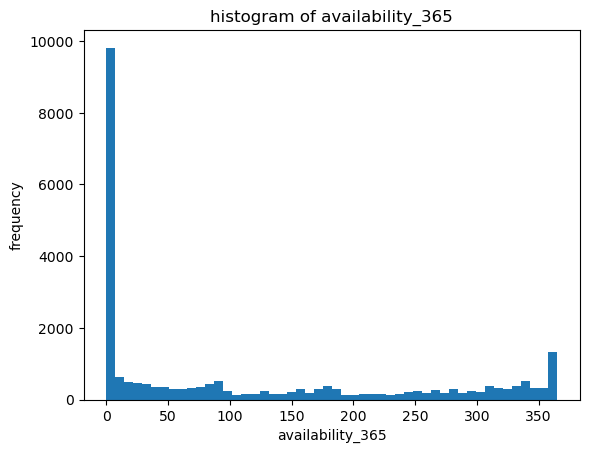

In [10]:
numeric_features = ['latitude', 'longitude', 'price', 'minimum_nights',
                    'calculated_host_listings_count', 'number_of_reviews', 'availability_365']
for num_feat in numeric_features:
    plt.hist(X_train[num_feat], bins=50)
    plt.xlabel(num_feat)
    plt.ylabel('frequency')
    plt.title('histogram of ' +  num_feat)
    plt.show();
# histogram summarize distribution of the numeric features

_For latitude, its centre is about 40.7 and its range is about from 40.55 to 40.90._

_For longitude, it is not symmetric. Most are between -74 and -73.9._

_For price, most are smaller than 1000._

_For minimum_nights and calculated_host_listings_count, most are about 0._

_For number_of_reviews, most are about 0. There is a little number over 100._

_For availability_365, most are about 0, and also some are more than 350._

- Most of our numeric features are in different ranges, so we need to scale them.
- neighbourhood has a lot of categories. Since neighbourbood_group is the higher level of neighbourhood, we decide to drop 'neighbourhood' to avoid redundant information._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1


#### 1. Feature engineering the 'last_review_date' to be the days away from [2023-10-26]

In [11]:

# 1. change the date information to be the difference with day [2023-10-26]
#from datetime import date
#print(date.today())
today_df = pd.DataFrame(['2023-10-26'] * len(X_train))
#print(today_df)
today_df.columns = ['today']
#print(today_df)
today_df['today'] = pd.to_datetime(today_df['today'])
X_train['last_review_to_today'] = (pd.to_datetime(X_train['last_review']) - 
                                   today_df['today']).dt.total_seconds()/(60*60*24)
print(X_train[['last_review_to_today']].describe())

today_df = pd.DataFrame(['2023-10-26'] * len(X_test))
today_df.columns = ['today']
today_df['today'] = pd.to_datetime(today_df['today'])
X_test['last_review_to_today'] = (pd.to_datetime(X_test['last_review']) - 
                                  today_df['today']).dt.total_seconds()/(60*60*24)
print(X_test[['last_review_to_today']].describe())
print(X_train['last_review_to_today'].corr(y_train))

       last_review_to_today
count          10359.000000
mean           -2006.196641
std              505.777227
min            -4595.000000
25%            -2370.000000
50%            -1759.000000
75%            -1592.000000
max            -1571.000000
       last_review_to_today
count          10022.000000
mean           -1998.649471
std              501.345507
min            -4550.000000
25%            -2357.000000
50%            -1757.000000
75%            -1592.000000
max            -1571.000000
0.4857250031604935


###  2. Add a feature called 'min_total_price', which indicate the lowest price the customer will spend

In [12]:
#2. Add a feature 'min_total_price', which indicate the lowest price the custom will spend
X_train['min_total_price'] = X_train['price'] * X_train['minimum_nights']
print(X_train['min_total_price'].corr(y_train))
X_test['min_total_price'] = X_test['price'] * X_test['minimum_nights']
print(X_test['min_total_price'].corr(y_test))

-0.04249629734054659
-0.04431972345924777


In [13]:
# helper functions to get mean and std of cross validation
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train,  scoring = 'neg_root_mean_squared_error',**kwargs,)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify any data cleaning that needs to be done and perform it.
2. Identify different feature types and the transformations you would apply on each feature type. 
3. Define a column transformer, if necessary.
4. You have likely noticed the `number_of_reviews` feature will be higly informative for the target `reviews_per_month`. To make this assignment more interesting **drop** the `number_of_reviews` feature.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

### 1. Data cleaning needs
1. Impute missing values of features of name, last_review_to_today in X_train and X_test
2. Impute missing values in y_train and y_test


In [14]:
# Preprocess the NaN values in X_train and y_train
# fill the NaN values in the name column with ' ', otherwise the CountVectorizer will not work
X_train['name'] = X_train['name'].fillna(' ')
X_train['name'].info()
X_test['name'] = X_test['name'].fillna(' ')
X_test['name'].info()

#### 0. Fill the missing value in 'reviews_per_month' as 0
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)
print(y_train.info())

<class 'pandas.core.series.Series'>
Index: 24447 entries, 23991 to 15725
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
24447 non-null  object
dtypes: object(1)
memory usage: 898.0+ KB
<class 'pandas.core.series.Series'>
Index: 24448 entries, 29122 to 34215
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
24448 non-null  object
dtypes: object(1)
memory usage: 898.0+ KB
<class 'pandas.core.series.Series'>
Index: 24447 entries, 23991 to 15725
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
24447 non-null  float64
dtypes: float64(1)
memory usage: 898.0 KB
None


### 2. Identify features
drop_features: 
- we need to drop 'id' and 'host_id' because they are irrevelant to the 'reviews_per_month'. 
- we decided to drop 'neighbourhood' because it has a lot of categories. since we have a higher level of 'neighbourhood_group' and we also have longitude and latitude as location information, we think 'neighbourhood' is redundant.
- We drop 'last_review' because we have a new feature 'last_review_to_today' which is more informative.



In [71]:
#X_train.info()
print(X_train.describe(include='all'))

drop_features = ['id', 'host_id', 'last_review', 'number_of_reviews', 'host_name','neighbourhood']

# id, host_id,does not help
numeric_features = [ "latitude", "longitude", 'price', 'minimum_nights', 'min_total_price', 'calculated_host_listings_count', 'availability_365', 'last_review_to_today']
# numerical features does not have missing values. so only need scaler

ordinal_features = ['room_type'] # room_type: 3 'Entire home/apt', 'private room', 'others'
#print(X_train['room_type'].value_counts())
orders = ['Entire home/apt', 'Private room', 'Shared room']

categorical_features = ['neighbourhood_group']

text_feature = 'name'



                  id                          name       host_id host_name  \
count   2.444700e+04                         24447  2.444700e+04     24438   
unique           NaN                         24132           NaN      7478   
top              NaN  New york Multi-unit building           NaN     David   
freq             NaN                            10           NaN       208   
mean    1.885802e+07                           NaN  6.684988e+07       NaN   
std     1.102947e+07                           NaN  7.828249e+07       NaN   
min     2.539000e+03                           NaN  2.438000e+03       NaN   
25%     9.275326e+06                           NaN  7.737249e+06       NaN   
50%     1.941033e+07                           NaN  3.028359e+07       NaN   
75%     2.912663e+07                           NaN  1.056545e+08       NaN   
max     3.648561e+07                           NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood      latitude     long

In [74]:
print(len(numeric_features + ordinal_features + categorical_features))

10


### 3. Define a column transformer
- For ordinal_features, we apply OrdinalEncoder.
- For numeric_features, we apply SimpleImputer and StandardScaler.
- For categorical_features, we apply SimpleImputer and OneHotEncoder.
- For text_feature, we apply CountVectorizer.



In [16]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

stp_words = ['1', 'in', 'a','an', 'to', 'two', 'the', 'to', 'near', 'with', 'of', 'and']

preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_features), 
    (OrdinalEncoder(categories = [orders]), ordinal_features),
    (make_pipeline(SimpleImputer(strategy = 'constant', fill_value='missing'),
                   OneHotEncoder(handle_unknown = 'ignore')), categorical_features),
    (CountVectorizer(max_features = 10, stop_words= stp_words), text_feature),
    ('drop', drop_features))

#print(preprocessor)
print(len(numeric_features + ordinal_features + categorical_features + drop_features))
print(X_train.shape)
print(preprocessor)
preprocessor.fit(X_train, y_train)


16
(24447, 17)
ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['latitude', 'longitude', 'price',
                                  'minimum_nights', 'min_total_price',
                                  'calculated_host_listings_count',
                                  'availability_365', 'last_review_to_today']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Entire home/apt',
                                                             'Private r...
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'))

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['latitude', 'longitude', 'price',
                                  'minimum_nights', 'min_total_price',
                                  'calculated_host_listings_count',
                                  'availability_365', 'last_review_to_today']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Entire home/apt',
                                                             'Private r...
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['neighbourhood_group']),
                                ('countvectorizer',
                                 CountVectorizer(max_features=10,
                                                 stop_words=['1', 'in', 'a',
                                                             'an', 'to', 'two',
                                                             'the', 'to',
                                                             'near', 'with',
                                                             'of', 'and']),
                                 'name'),
                                ('drop', 'drop',
                                 ['id', 'host_id', 'last_review',
                                  'number_of_reviews', 'host_name',
                                  'neighbourhood'])])

In [17]:
print(numeric_features + ordinal_features + categorical_features)

['latitude', 'longitude', 'price', 'minimum_nights', 'min_total_price', 'calculated_host_listings_count', 'availability_365', 'last_review_to_today', 'room_type', 'neighbourhood_group']


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

- We used negative_root_mean_squared_error as the scoring method.
- The 5-fold validation score is -1.608 (+/-0.104), which means that the prediction is on average 1.608 away from target value. We also fit and predict on the whole training data, and the mean_squared_error is 1.611.

In [18]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

dummy_model = DummyRegressor()
pipe_dummy = make_pipeline(preprocessor, dummy_model)
print(pd.DataFrame(mean_std_cross_val_scores(pipe_dummy, X_train, y_train, return_train_score = True)).T);

pipe_dummy.fit(X_train, y_train)
np.sqrt(mean_squared_error( y_train, pipe_dummy.predict(X_train)))

            fit_time         score_time          test_score  \
0  0.081 (+/- 0.009)  0.019 (+/- 0.002)  -1.608 (+/- 0.104)   

          train_score  
0  -1.611 (+/- 0.027)  


/var/folders/2v/xklqlz697gd0s_ctmp05p_rc0000gn/T/ipykernel_21395/3100070162.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


1.6107975150807488

<!-- END QUESTION -->



<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

**Answer:**
1. We use Ridge for linear model.
2. We used GridSearch to optimize 6 possible alpha (1, 10, 100, 1000, 10000, 100000). The best alpha is 10, giving the highest neg_root_mean_squared_error of -1.50785 in the validation data.
3. The 5-fold validation score is -1.50785 (+/-0.11), which means that the prediction is on average 1.508 away from target value. We also fit and predict on the whole training data, and the root_mean_squared_error is 1.5086.
4. After hyperparameter optimization, we used Ridge with alpha 10 to train our model, the root_mean_squared_error is 1.508 during cross validation, which is higher than the dummy model of 1.608. In addition, we notice that the validation score is close to train score, but both of them are not satisfied. We can try other models to see if we can get a better result. The mean fit time is 0.244 and score time is 0.064.

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

pipe_ridge = make_pipeline(preprocessor,Ridge(random_state = 123))
# pipe_ridge.fit(X_train, y_train)
# np.sqrt(mean_squared_error(y_train, pipe_ridge.predict(X_train)))
#print(pipe_ridge)

In [20]:
# get the feature names after transformation
new_text_features = pipe_ridge.named_steps['columntransformer'].named_transformers_['countvectorizer'].get_feature_names_out().tolist()
new_categorical_features = pipe_ridge.named_steps['columntransformer'].named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names_out().tolist()

# create the new_features encompassing all columns after applying preprocessor
new_features =  numeric_features + ordinal_features + new_categorical_features + new_text_features
print(new_features)
print(len(new_features))

['latitude', 'longitude', 'price', 'minimum_nights', 'min_total_price', 'calculated_host_listings_count', 'availability_365', 'last_review_to_today', 'room_type', 'x0_Bronx', 'x0_Brooklyn', 'x0_Manhattan', 'x0_Queens', 'x0_Staten Island', 'apartment', 'apt', 'bedroom', 'brooklyn', 'cozy', 'manhattan', 'private', 'room', 'spacious', 'studio']
24


In [21]:
# hyperparameters tuning: grid search
from sklearn.model_selection import GridSearchCV
#print(np.arange(-3,3,1))
param_grid = {'ridge__alpha': 10.0**np.arange(0,6,1)}
#print(paraGrid)

rs = GridSearchCV(pipe_ridge, 
                        param_grid = param_grid, 
                        n_jobs=-1,
                        scoring= 'neg_root_mean_squared_error',
                        return_train_score=True)
rs.fit(X_train, y_train)
cv_result = pd.DataFrame(rs.cv_results_)[
    [   "param_ridge__alpha",
        "mean_test_score",
        'mean_train_score',
        'mean_fit_time',
        "rank_test_score",]].set_index("rank_test_score").sort_index()
print(cv_result)

print(rs.best_params_) # best is 100, give me 0.211 validation score
print(rs.best_score_)

                param_ridge__alpha  mean_test_score  mean_train_score  \
rank_test_score                                                         
1                             10.0        -1.507824         -1.508107   
2                            100.0        -1.507825         -1.508238   
3                              1.0        -1.507841         -1.508104   
4                           1000.0        -1.509097         -1.509953   
5                          10000.0        -1.522475         -1.524228   
6                         100000.0        -1.575903         -1.578325   

                 mean_fit_time  
rank_test_score                 
1                     0.116717  
2                     0.111592  
3                     0.168593  
4                     0.117374  
5                     0.116474  
6                     0.109888  
{'ridge__alpha': 10.0}
-1.5078243738816035


In [22]:
# make a new model with alpha =100.0
pipe_ridge = make_pipeline(preprocessor,Ridge( alpha= 10, random_state = 123))
cv = pd.DataFrame(cross_validate(pipe_ridge, X_train, y_train))
results = {}
results['ridge'] = mean_std_cross_val_scores(pipe_ridge, X_train, y_train, return_train_score = True)
print(pd.DataFrame(results['ridge']))

                              0
fit_time      0.078 (+/- 0.004)
score_time    0.018 (+/- 0.001)
test_score   -1.508 (+/- 0.110)
train_score  -1.508 (+/- 0.029)


/var/folders/2v/xklqlz697gd0s_ctmp05p_rc0000gn/T/ipykernel_21395/3100070162.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [23]:
pipe_ridge.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_train, pipe_ridge.predict(X_train)))

1.5085949092292321

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

-1. RandomForest, XGBoost and LGBMRegressor are used.
-2. Speed:
Among those three models, RandomForest is always the slowest one in fitting and scoring. LGBMRegressor give us the fastest fitting and scoring time. However, their speeds are still slower than Ridge()
- Score:
- The validation score on LGBMRegressor is the highest with neg_root_mean_squared_error of -1.239, then randomForest(-1.265), xgboost (-1.269), and the lowest on Ridge(-1.508).
- Regarding the overfitting, we found randomForst has the highest level of overfitting, because the gap between the train and validation score is the largest one. LGBMRegressor has the lowest level of overfitting.
- Underfitting: Ridge has the severest underfitting, because their train and validation score are both low.
- In conclusion, based on the validation score, all three models beat the linear model of Ridge we tried before.


In [24]:

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

from sklearn.model_selection import cross_val_score

In [25]:
pipe_rf = make_pipeline(preprocessor, RandomForestRegressor(max_depth=100, n_jobs= -1, random_state=123))
results['randomForest'] = mean_std_cross_val_scores(pipe_rf, X_train, y_train,return_train_score= True)
print(pd.DataFrame(results['randomForest']))

                              0
fit_time      1.860 (+/- 0.013)
score_time    0.046 (+/- 0.005)
test_score   -1.264 (+/- 0.118)
train_score  -0.475 (+/- 0.013)


/var/folders/2v/xklqlz697gd0s_ctmp05p_rc0000gn/T/ipykernel_21395/3100070162.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [26]:
# note this is used to for shape
pipe_xgb = make_pipeline(preprocessor, XGBRegressor(random_state=123, verbosity=0))
results['xgboost'] = mean_std_cross_val_scores(pipe_xgb, X_train, y_train,return_train_score= True)
print(pd.DataFrame(results['xgboost']))

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/celine/anaconda3/envs/cpsc330/lib

                              0
fit_time      0.663 (+/- 0.023)
score_time    0.019 (+/- 0.000)
test_score   -1.264 (+/- 0.116)
train_score  -0.864 (+/- 0.009)


/var/folders/2v/xklqlz697gd0s_ctmp05p_rc0000gn/T/ipykernel_21395/3100070162.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [27]:
pipe_lgbm = make_pipeline(preprocessor, LGBMRegressor(random_state=123, verbose=-1))
results['LGBMRegressor'] = mean_std_cross_val_scores(pipe_lgbm, X_train, y_train,return_train_score= True)
print(pd.DataFrame(results['LGBMRegressor']))


                              0
fit_time      0.374 (+/- 0.023)
score_time    0.024 (+/- 0.000)
test_score   -1.239 (+/- 0.124)
train_score  -1.077 (+/- 0.024)


/var/folders/2v/xklqlz697gd0s_ctmp05p_rc0000gn/T/ipykernel_21395/3100070162.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [28]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
ridge,0.078 (+/- 0.004),0.018 (+/- 0.001),-1.508 (+/- 0.110),-1.508 (+/- 0.029)
randomForest,1.860 (+/- 0.013),0.046 (+/- 0.005),-1.264 (+/- 0.118),-0.475 (+/- 0.013)
xgboost,0.663 (+/- 0.023),0.019 (+/- 0.000),-1.264 (+/- 0.116),-0.864 (+/- 0.009)
LGBMRegressor,0.374 (+/- 0.023),0.024 (+/- 0.000),-1.239 (+/- 0.124),-1.077 (+/- 0.024)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_From the question above, we can see the XGBRegressor and LGBMRegressor are the two models with top performance. Thus, here we incorporated XGBRegressor into RFECV to evaluate the feature importance for the transformed 24 features. And then evaluate the performance of LGBMRegressor estimator after we remove the unimportant features._ <br>
- We Found that among 24 transformed features, only one of them are unimportant, 'X0_Bronx' which is one category from 'neighbourhood group' (which has 5 categories in total).
- However, when we compare the performance of LGBMRegressor estimator with and without feature selection, we found that removing features can get worse test score (-1.242) than before removing (-1.239), so we keep all the features.

In [29]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
X_train_transformed = preprocessor.fit_transform(X_train)

#### Perform RFECV using XGBRegressor model

In [30]:
X_train_tf = preprocessor.transform(X_train)
rfe_cv_XGBRegressor = RFECV(XGBRegressor(random_state=123), cv=5, verbose=0)
rfe_cv_XGBRegressor.fit(X_train_transformed, y_train)
pd.DataFrame([new_features, rfe_cv_XGBRegressor.support_]).T
#print(rfe_cv_XGBRegressor.support_)

,0,1
0,latitude,True
1,longitude,True
2,price,True
3,minimum_nights,True
4,min_total_price,True
5,calculated_host_listings_count,True
6,availability_365,True
7,last_review_to_today,True
8,room_type,True
9,x0_Bronx,False


#### using the feature selected by RFECV, train LGBMRegressor estimators and compare the performance without feature selection

In [31]:
compare_results = {}
rfe_pipe = make_pipeline(
    preprocessor,
    rfe_cv_XGBRegressor,
    LGBMRegressor(random_state=123, verbose=-1),
)

compare_results['LGBMRegerssor'] = results['LGBMRegressor']
compare_results['LGBMRegressor_REFCV'] = mean_std_cross_val_scores(rfe_pipe, X_train, y_train, return_train_score = True)
print(pd.DataFrame(compare_results).T)

                               fit_time         score_time  \
LGBMRegerssor         0.374 (+/- 0.023)  0.024 (+/- 0.000)   
LGBMRegressor_REFCV  54.072 (+/- 8.607)  0.030 (+/- 0.008)   

                             test_score         train_score  
LGBMRegerssor        -1.239 (+/- 0.124)  -1.077 (+/- 0.024)  
LGBMRegressor_REFCV  -1.238 (+/- 0.122)  -1.076 (+/- 0.025)  


/var/folders/2v/xklqlz697gd0s_ctmp05p_rc0000gn/T/ipykernel_21395/3100070162.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


**Result**:
After eliminating features determined by refcv, for the XGBRegressor estimator, removing features can get worse test score (-1.242) than before removing (-1.239), so we keep all the features.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_We used GridSearchCV for Ridge(). For Ridge model, best ridge__alpha is 10. For this alpha, its score is -1.5078._ <br>
_We used RandomizedSearchCV for RandomForestRegressor model, best n_estimators is 128, max_depth is 30, and best max features is 6. For these three hyperparameter, its score is -1.2411_ <br>
_We used RandomizedSearchCV for XGBRegressor model, best n_estimators is 512, and best max_depth is 10. For these two hyperparameter, its score is -1.3280._ <br>
_We used RandomizedSearchCV for LGBMRegressor model. best n_estimators is 128, max_depth is 10. For these two hyperparameter, its score is -1.2368._
_Compare across four models, we think the LGBMRegressor give us the fastest fitting and scoring time, and the highest validation score. Thus, we will use LGBMRegressor for our final model._

In [32]:
# hyperparameters tuning: randomize
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [33]:
# Ridge
#print(np.arange(-3,3,1))
param_grid = {'ridge__alpha': 10.0**np.arange(0,6,1)}
#print(paraGrid)

rs_ridge = GridSearchCV(pipe_ridge,
                        param_grid = param_grid, 
                        n_jobs=-1,
                        scoring= 'neg_root_mean_squared_error',
                        return_train_score=True)
rs_ridge.fit(X_train, y_train)
cv_result = pd.DataFrame(rs_ridge.cv_results_)[
    [   "param_ridge__alpha",
        "mean_test_score",
        'mean_train_score',
        'mean_fit_time',
        "rank_test_score",]].set_index("rank_test_score").sort_index()
print(pd.DataFrame(cv_result))
print(rs_ridge.best_params_)
print(rs_ridge.best_score_)



                param_ridge__alpha  mean_test_score  mean_train_score  \
rank_test_score                                                         
1                             10.0        -1.507824         -1.508107   
2                            100.0        -1.507825         -1.508238   
3                              1.0        -1.507841         -1.508104   
4                           1000.0        -1.509097         -1.509953   
5                          10000.0        -1.522475         -1.524228   
6                         100000.0        -1.575903         -1.578325   

                 mean_fit_time  
rank_test_score                 
1                     0.183047  
2                     0.175238  
3                     0.203985  
4                     0.192445  
5                     0.198913  
6                     0.192665  
{'ridge__alpha': 10.0}
-1.5078243738816035


For Ridge model, best ridge__alpha is 10. For this alpha, its score is -1.5078.

In [34]:
# # RandomForestRegressor
param_grid2 = {'randomforestregressor__n_estimators': 2**np.arange(1,10,1),
               'randomforestregressor__max_depth': 10*np.arange(1,20,1),
              'randomforestregressor__max_features': 2*np.arange(1,8,1),
}

rs_rf = RandomizedSearchCV(pipe_rf,
                        param_distributions = param_grid2, 
                        n_iter=20, 
                        n_jobs=-1,
                        scoring= 'neg_root_mean_squared_error',
                        return_train_score=True)
rs_rf.fit(X_train, y_train)
cv_result2 = pd.DataFrame(rs_rf.cv_results_)[
    [   "param_randomforestregressor__n_estimators",
        "param_randomforestregressor__max_depth",
        "param_randomforestregressor__max_features",
        "mean_test_score",
        'mean_train_score',
        'mean_fit_time',
        "rank_test_score",]].set_index("rank_test_score").sort_index()
print(cv_result2)

print(rs_rf.best_params_)
print(rs_rf.best_score_)

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


                param_randomforestregressor__n_estimators  \
rank_test_score                                             
1                                                     512   
2                                                     256   
3                                                     512   
3                                                     512   
5                                                     512   
6                                                      64   
7                                                      64   
8                                                      64   
9                                                      32   
10                                                    512   
11                                                     32   
12                                                     32   
13                                                    512   
14                                                     16   
15                      

For RandomForestRegressor model, best n_estimators is 128, max_depth is 30, and best max features is 6. For these three hyperparameter, its score is -1.2411.

In [35]:
# XGBRegressor
pipe_xgb = make_pipeline(preprocessor, XGBRegressor(random_state=123, verbosity=0))
param_grid3 = {'xgbregressor__n_estimators':  2**np.arange(1,10,1),
              'xgbregressor__max_depth': 10*np.arange(1,20,1),
              }
rs_xgb = RandomizedSearchCV(pipe_xgb,
                        param_distributions = param_grid3, 
                        n_iter=20,
                        n_jobs=-1,
                        scoring= 'neg_root_mean_squared_error',
                        return_train_score=True)
rs_xgb.fit(X_train, y_train)
cv_result3 = pd.DataFrame(rs_xgb.cv_results_)[
    [   "param_xgbregressor__n_estimators",
        "param_xgbregressor__max_depth",
        "mean_test_score",
        'mean_train_score',
        'mean_fit_time',
        "rank_test_score",]].set_index("rank_test_score").sort_index()
print(cv_result3)
print(rs_xgb.best_params_)
print(rs_xgb.best_score_)


/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/celine/anaconda3/envs/cpsc330/lib

                param_xgbregressor__n_estimators  \
rank_test_score                                    
1                                            256   
2                                              4   
3                                              4   
3                                              4   
3                                              4   
3                                              4   
7                                             16   
7                                             16   
9                                             32   
9                                             32   
9                                             32   
12                                           512   
13                                           256   
13                                           256   
15                                            64   
15                                            64   
15                                            64   
18          

For XGBRegressor model, best n_estimators is 512, and best max_depth is 10. For these two hyperparameter, its score is -1.3280.

In [36]:
# LGBMRegressor
pipe_lgbm = make_pipeline(preprocessor, LGBMRegressor(random_state=123, verbose=-1))
param_grid4 = {'lgbmregressor__n_estimators': 2**np.arange(1,10,1),
              'lgbmregressor__max_depth': 10*np.arange(1,20,1)}

rs_lgbm = RandomizedSearchCV(pipe_lgbm,
                        param_distributions = param_grid4, 
                        n_iter=20,
                        n_jobs=-1,
                        scoring= 'neg_root_mean_squared_error',
                        return_train_score=True)
rs_lgbm.fit(X_train, y_train)

pd.DataFrame(rs_lgbm.cv_results_)
cv_result4 = pd.DataFrame(rs_lgbm.cv_results_)[
    [   "param_lgbmregressor__n_estimators",
        "param_lgbmregressor__max_depth",
        "mean_test_score",
        'mean_train_score',
        'mean_fit_time',
        "rank_test_score",]].set_index("rank_test_score").sort_index()
print(cv_result4)
print(rs_lgbm.best_params_)
print(rs_lgbm.best_score_)

                param_lgbmregressor__n_estimators  \
rank_test_score                                     
1                                             256   
2                                             256   
3                                              64   
3                                              64   
3                                              64   
6                                             512   
7                                              32   
7                                              32   
7                                              32   
7                                              32   
7                                              32   
12                                             32   
13                                             16   
13                                             16   
15                                              8   
15                                              8   
17                                            

We used RandomizedSearchCV for LGBMRegressor model. best n_estimators is 128, max_depth is 10. For these two hyperparameter, its score is -1.2368.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

1. We used shap to get the contribution of each features for LGBMRegressor model. By plotting the mean SHAP value for each feature, we found 'availability_365' is the most important feature. The detail bar plot is shown below.
2. Other observations: (details are shown below in the figures)
- We further plot the dependence_plot on 'availability_365', as 'availability_365' increase, the target values first increase, then drop. The detail plot is shown below.
- Beside 'availability_365', other three features are also very important, they are 'minimal_nights', 'last_review_to_today', 'min_total_price' and 'room_type'.
- We also plot the dependence_plot on 'last_review_to_today', as 'last_review_to_today' increase, the target values first increase, then drop. The detail plot is shown below.
- We also plot the dependence_plot on 'minimal_nights'. As we increase the minimum_nights from 0 to ~50, the SHAP values drop drastically from postive to negative, then become relative stable at the negative range.  this feature have a negative contribution to the prediction
- We also plot the dependence_plot on 'last_review_to_today'. As the last_review_to_today increase from negative to positive (more close to today), the SHAP values increase drastically from negative to positive. this feature have a positive contribution to the prediction and increase the target value
- We finally provide summary_plot which shows the details about impact from each features


### Get the SHAP value for each feature on the LGBMegressor model with optimized hyperparameter

In [37]:
# create the X_train_enc
preprocessor.fit(X_train)

X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=new_features,
    index=X_train.index,
)
X_train_enc.head()


,latitude,longitude,price,minimum_nights,min_total_price,calculated_host_listings_count,availability_365,last_review_to_today,room_type,x0_Bronx,...,apartment,apt,bedroom,brooklyn,cozy,manhattan,private,room,spacious,studio
23991,1.429067,-0.220171,-0.432432,-0.095378,-0.102466,-0.184045,0.338596,1.255083,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47383,-0.627035,1.827235,-0.389602,-0.183033,-0.109668,-0.028386,-0.543596,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36017,-0.232679,-1.127080,-0.132619,-0.095378,-0.066457,-0.184045,-0.665277,0.000000,1.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25554,-0.927924,-0.047303,0.629765,-0.226861,-0.066869,-0.121781,0.581959,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30415,-0.692151,-0.882688,-0.432432,0.123759,-0.076745,-0.184045,-0.855405,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [38]:
import shap

In [39]:
# use optimized hyperparameter to train lgbm model
lgbm_optimal = LGBMRegressor(randon_state=123, n_estimators=128, max_depth=10)
lgbm_optimal.fit(X_train_enc, y_train)
lgbm_explainer = shap.TreeExplainer(lgbm_optimal)
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)
train_lgbm_shap_values

[LightGBM] [Warning] Unknown parameter: randon_state
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: randon_state
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1666
[LightGBM] [Info] Number of data points in the train set: 24447, number of used features: 24
[LightGBM] [Info] Start training from score 1.087960


array([[ 4.08562077e-04, -1.83960862e-02,  2.20652647e-03, ...,
         7.02818368e-03,  5.49164351e-03, -5.27657912e-05],
       [-7.76393840e-02,  6.79518392e-02,  7.71061478e-02, ...,
        -7.32403368e-03,  3.26486649e-03, -2.17975544e-03],
       [-3.21666679e-03, -2.76661514e-02,  5.87927131e-02, ...,
         5.08177237e-04,  6.42437129e-03, -4.52457384e-04],
       ...,
       [ 6.18216108e-03, -3.23108876e-02, -6.38629211e-02, ...,
         3.97887043e-04, -1.62926507e-02, -4.10276838e-04],
       [-3.82218098e-01, -1.03482143e-01,  1.25002185e-01, ...,
        -1.08378993e-02,  7.02452641e-03, -2.59825170e-03],
       [ 2.14708216e-02,  1.42465212e-01,  1.74569647e-02, ...,
         1.75503363e-03,  2.99923497e-03,  1.24065991e-03]])

### SHAP force plots


                                SHAP values
latitude                          -0.077639
longitude                          0.067952
price                              0.077106
minimum_nights                    -0.018899
min_total_price                   -0.021832
calculated_host_listings_count     0.105790
availability_365                   0.382444
last_review_to_today               0.022689
room_type                         -0.162982
x0_Bronx                          -0.000051
x0_Brooklyn                       -0.006907
x0_Manhattan                      -0.053336
x0_Queens                         -0.001713
x0_Staten Island                  -0.001512
apartment                          0.007217
apt                                0.007236
bedroom                           -0.003710
brooklyn                          -0.000334
cozy                               0.031849
manhattan                         -0.009804
private                           -0.027012
room                            

<Figure size 2500x500 with 0 Axes>

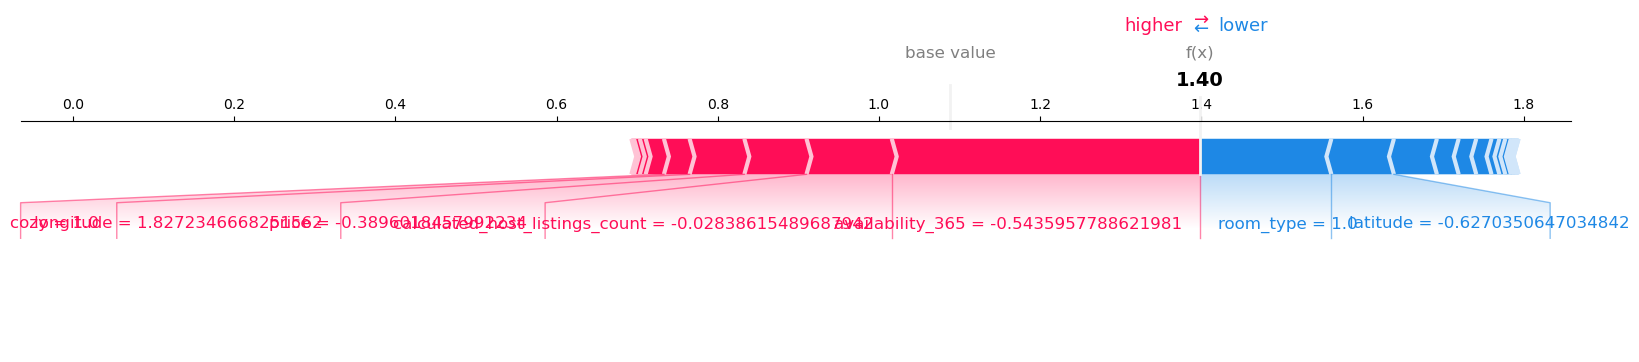

In [40]:
shap.initjs()

print(pd.DataFrame(
    train_lgbm_shap_values[1],
    index=new_features,
    columns=["SHAP values"],))
plt.figure(figsize=(25, 5))

shap.force_plot(
    lgbm_explainer.expected_value, # expected value
    train_lgbm_shap_values[1, :], # SHAP values associated with the example we want to explain
    X_train_enc.iloc[1, :], # Feature vector of the example
    matplotlib=True,
)


In the figure above, we used SHAP force plot to get an overview of which feature values are playing a role in this predicting the reviews_per_year for the first data point in training data.

- The prediction is 1.40, which is much higher than the base value.

### Plot the global feature importance using SHAP
The bar chart below plotted the mean SHAP value for each feature. Availability_365 and minimal_nights, last_review_to_today and min_total_price (customer has to spend) are the top four importance features to the prediction.

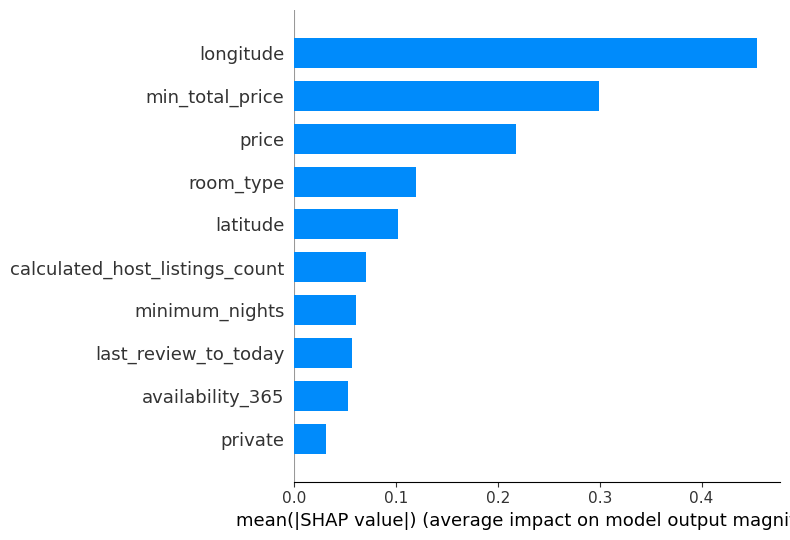

In [41]:
import shap
import pandas as pd

# Assuming train_lgbm_shap_values is a NumPy array
# Assuming X_train_enc is a DataFrame

# average absolute value of the SHAP values for each feature
values = np.abs(train_lgbm_shap_values).mean(0)
shap_df = pd.DataFrame(data=values, index=X_train_enc.columns, columns=["SHAP"])
top_10_features = shap_df.sort_values(by="SHAP", ascending=False).head(10)

# Extract the top 10 feature names
top_10_feature_names = top_10_features.index.tolist()

# Filter SHAP values and X_train_enc for only the top 10 features
top_10_shap_values = train_lgbm_shap_values[:, X_train_enc.columns.isin(top_10_feature_names)]
top_10_X_train_enc = X_train_enc[top_10_feature_names]

# Create a summary plot for the top 10 features
shap.summary_plot(top_10_shap_values, top_10_X_train_enc, plot_type="bar")


### Dependence plot


In [43]:
X_train_enc['last_review_to_today'].max()

1.3219075897566865

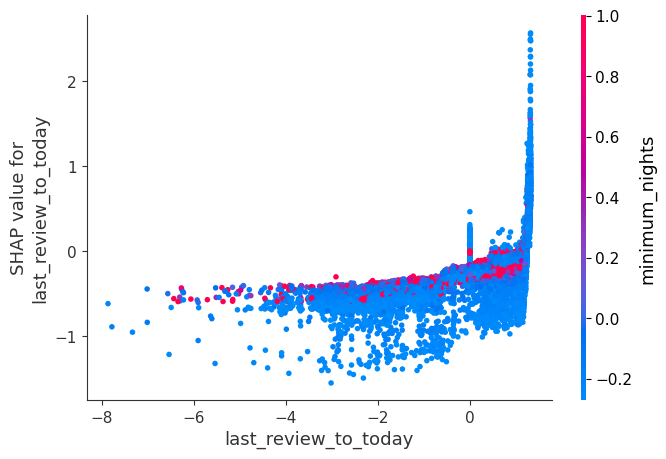

In [44]:
shap.dependence_plot("last_review_to_today", train_lgbm_shap_values, X_train_enc)

The above plot shows the effect of last_review_to_today feature to prediction. 

- Each dot is a single prediction for examples above.
- The x-axis represents values of the feature last_review_to_today (scaled).
- The y-axis is the SHAP value for that feature, which represents how much knowing that feature's value changes the output of the model for that example's prediction. 
- Lower values of last_review_to_today have smaller SHAP values.
- There is some optimal value of last_review_to_today around scaled 0.5, which gives highest SHAP values.
- The color corresponds to a second feature (minimum_nights) that may have an interaction effect with the feature we are plotting. Minimum_nights alway have higher SHAP values than the majority examples of last_review_to_today.

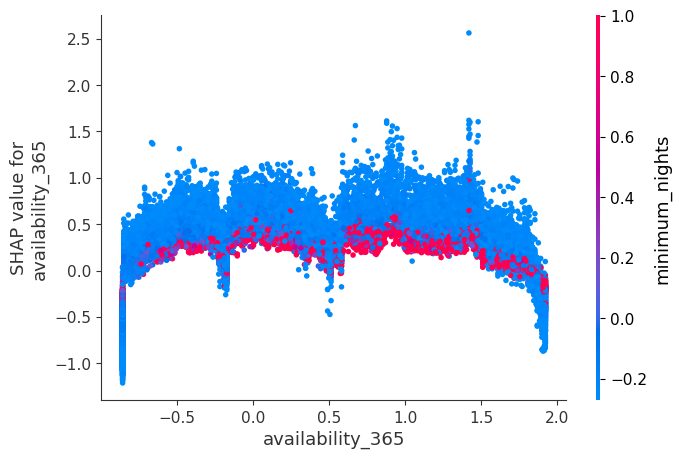

In [45]:
shap.dependence_plot("availability_365", train_lgbm_shap_values, X_train_enc)

he above plot shows the effect of availability_365 feature to prediction.

- The biggest observation is that as the scaled availability_365 increases, the SHAP values fluctuate between 0 and 1.
- There are some optimal examples with thier SHAP values surged when the scaled availability_365 is close to 1.4
- Both of the lowest and highest availability_365 have the lowest SHAP values.

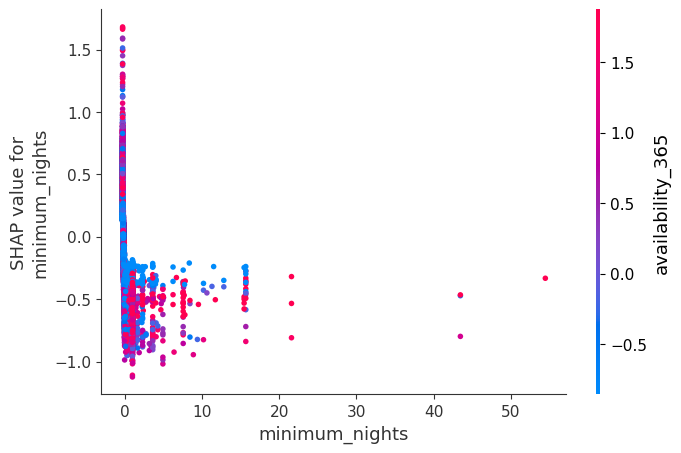

In [46]:
shap.dependence_plot("minimum_nights", train_lgbm_shap_values, X_train_enc)

The above plot shows the effect of minimum_nights feature to prediction. 

As we increase the minimum_nights from 0 to ~50, the SHAP values drop drastically from postive to negative, then become relative stable at the negative range.
we are confident to say that this feature have a negative contribution to the prediction, which algins with common sense that high threshold of booking nights may attract less customers and therefore less reviews per month.

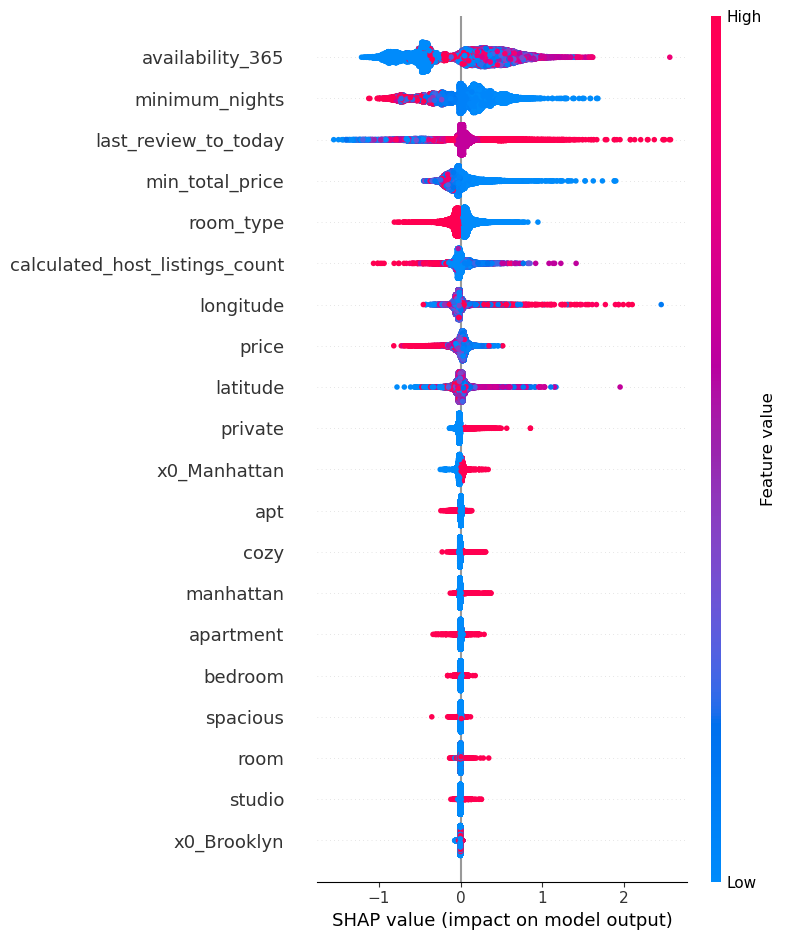

In [47]:
shap.summary_plot(train_lgbm_shap_values, X_train_enc)

The Above plot shows the most important features for predicting the class. It also shows the direction of how it’s going to drive the prediction, for example:
- The larger last review days (more close to current date) seems to have bigger SHAP values for reviews_per_month.
- Higher minimum_nights seem to have lower SHAP values whereas smaller levels of minimum_nights have larger SHAP values for reviews_per_month.

In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

1. after the hyperparameter optimization, we determine that the LGBMRegressor has the fastest speed and highest cross validation score. Thus we choose it as our final model with optimized hyperparameters. The RMSE on test data is 1.1943.
2. The RMSE of test data is 1.1943, which is slightly lower than the validation RMSE of 1.237. We think we are lucky to get better performance on test data, but they are still close. (Notably, because limited by our laptop performance, we followed the HW instruction to shrink the train data size to 50% and enlarge the test size to 50%, this may impact our result. But we think we still have a enough data even after shrinking the train data size to 50%, so the performance is reliable)

3. For the first example in test data, we obtained the SHAP values and use SHAP force plot to get an overview of which feature values are playing a role as shown below. The feature with positive SHAP values will push the prediction higher, and the feature with negative SHAP values will push the prediction lower. Details can be found below

In [50]:
lgbm_optimal = LGBMRegressor(randon_state=123, n_estimators=128, max_depth=10, verbose=-1)
pipe_lgbm_optimal = make_pipeline(preprocessor, lgbm_optimal)
print(pd.DataFrame(mean_std_cross_val_scores(pipe_lgbm_optimal, X_train, y_train, return_train_score = True)))

results["LGBM_optimized"] = mean_std_cross_val_scores(pipe_lgbm_optimal, X_train, y_train,return_train_score= True)

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


                              0
fit_time      0.499 (+/- 0.046)
score_time    0.034 (+/- 0.003)
test_score   -1.237 (+/- 0.122)
train_score  -1.060 (+/- 0.025)


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [51]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
ridge,0.078 (+/- 0.004),0.018 (+/- 0.001),-1.508 (+/- 0.110),-1.508 (+/- 0.029)
randomForest,1.860 (+/- 0.013),0.046 (+/- 0.005),-1.264 (+/- 0.118),-0.475 (+/- 0.013)
xgboost,0.663 (+/- 0.023),0.019 (+/- 0.000),-1.264 (+/- 0.116),-0.864 (+/- 0.009)
LGBMRegressor,0.374 (+/- 0.023),0.024 (+/- 0.000),-1.239 (+/- 0.124),-1.077 (+/- 0.024)
LGBM_optimized,0.493 (+/- 0.016),0.033 (+/- 0.001),-1.237 (+/- 0.122),-1.060 (+/- 0.025)


In [52]:
pipe_lgbm_optimal.fit(X_train, y_train)
print('root mean squared error on test data is %.6f' % np.sqrt(mean_squared_error(y_test, pipe_lgbm_optimal.predict(X_test))))

root mean squared error on test data is 1.194265


In [53]:
# create the X_train_enc
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=new_features,
    index=X_test.index,
)
X_test_enc.head()

,latitude,longitude,price,minimum_nights,min_total_price,calculated_host_listings_count,availability_365,last_review_to_today,room_type,x0_Bronx,...,apartment,apt,bedroom,brooklyn,cozy,manhattan,private,room,spacious,studio
29122,-0.638924,0.857013,-0.496678,-0.183033,-0.117384,-0.184045,-0.855405,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2964,0.334711,-0.571309,-0.282526,-0.270688,-0.119442,-0.184045,-0.741328,0.690109,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14184,-1.603231,-0.310927,-0.411017,-0.095378,-0.099894,-0.184045,-0.855405,-1.612313,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1174,1.209025,-0.224061,-0.222563,-0.270688,-0.118002,-0.184045,1.015450,1.276345,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42853,-0.903779,0.924864,-0.325356,-0.226861,-0.112755,-0.184045,-0.855405,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)

In [55]:
print(pd.DataFrame(
    train_lgbm_shap_values[1],
    index=new_features,
    columns=["SHAP values"],).sort_values(by="SHAP values", ascending=False))

                                SHAP values
availability_365                   0.382444
calculated_host_listings_count     0.105790
price                              0.077106
longitude                          0.067952
cozy                               0.031849
last_review_to_today               0.022689
apt                                0.007236
apartment                          0.007217
spacious                           0.003265
x0_Bronx                          -0.000051
brooklyn                          -0.000334
x0_Staten Island                  -0.001512
x0_Queens                         -0.001713
studio                            -0.002180
bedroom                           -0.003710
x0_Brooklyn                       -0.006907
room                              -0.007324
manhattan                         -0.009804
minimum_nights                    -0.018899
min_total_price                   -0.021832
private                           -0.027012
x0_Manhattan                    

##### The table above show the SHAP values from all the feature in the first data point in test data.

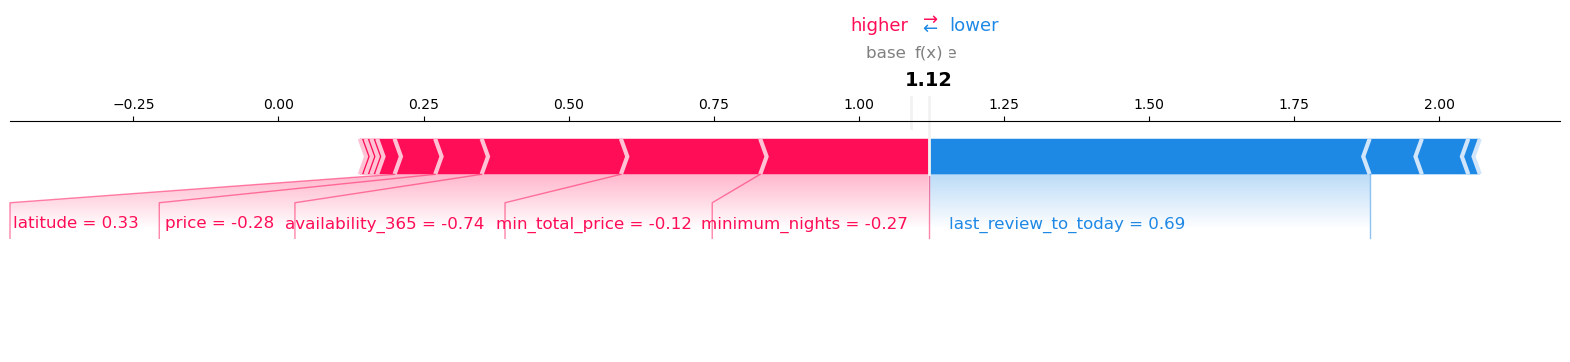

,latitude,longitude,price,minimum_nights,min_total_price,calculated_host_listings_count,availability_365,last_review_to_today,room_type,x0_Bronx,...,apartment,apt,bedroom,brooklyn,cozy,manhattan,private,room,spacious,studio
29122,-0.638924,0.857013,-0.496678,-0.183033,-0.117384,-0.184045,-0.855405,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2964,0.334711,-0.571309,-0.282526,-0.270688,-0.119442,-0.184045,-0.741328,0.690109,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14184,-1.603231,-0.310927,-0.411017,-0.095378,-0.099894,-0.184045,-0.855405,-1.612313,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1174,1.209025,-0.224061,-0.222563,-0.270688,-0.118002,-0.184045,1.015450,1.276345,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42853,-0.903779,0.924864,-0.325356,-0.226861,-0.112755,-0.184045,-0.855405,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29685,1.522901,-0.000197,-0.351054,-0.270688,-0.121088,0.127272,1.920458,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0
41246,-0.310233,-0.959398,-0.231129,-0.270688,-0.118207,-0.121781,0.467883,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30877,0.587128,-0.795822,0.638331,-0.270688,-0.097322,-0.184045,-0.642462,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3707,0.289898,0.012336,-0.308224,0.342897,-0.006270,-0.152913,0.954609,1.182183,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [56]:
rounded_shap_values = np.round(test_lgbm_shap_values[1, :], 2)
lgbm_explainer.expected_value = np.round(lgbm_explainer.expected_value, 2)
shap.force_plot(
    lgbm_explainer.expected_value,
    rounded_shap_values,
    np.round(X_test_enc.iloc[1, :], 2),
    matplotlib=True
)
lgbm_explainer.expected_value 
rounded_shap_values 
X_test_enc

###  Interpretation of SHAP for the first example in test data
From the SHAP value data frame and the force plot, we can see that following feature have a positve SHAP value, including availability_365, calculated_host_listings_count, longitude, cozy, price, last_review_to_today, min_total_price, apt, spacious, bedroom, minimum_nights, apartment, x0_Brooklyn. They push the prediction higher. The rest features push the prediction lower. Finally, the prediction is 1.11, which is higher than the base value.

In [57]:
...

Ellipsis

In [58]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

### _1. Summary of the results._ <br>
| Model | validation_score_RMSE | test_score_RMSE | fit time | score time |
| --- | --- | --- | ---| --- |
| LGBMRegressor | 1.237 |  1.1943 | 0.298 | 0.049 |

### _2. Concluding remarks._ <br>

Among all the linear and tree-based models we have implemented in project, LGBMRegressor has the best performance with a RMSE of -1.1943 on the test data. This means the prediction of the model will generally result a 1.19 result difference compare with the actual number of reviews per month. We think this error is too large compared with the scale of the actual target value. As shown in the statistics above, the mean value of reviews_per_month in y_test is 1.09, and the stand deviation of the target value is 1.58. Therefore, we are not confident that this model can predict reviews_per_month accurately. <br>

###  _2. Other ideas that may improve the performance._  <br>
**A** If we have enough computation power, we can discretize the longitude and latitude information to make it more informative.

**B** Instead of simple imputation, we can also use KNN to imputate the missied categorical features in this application.

**C** We can also introduce pretrained nlkt model to extract the representative information from name rather simple bag-of-words method we used here (CountVectorizer)._ <br>
**D** We may also try exploring more relevant features in the reviews.csv file for predicting the problem. <br>
**E** We notice there are some outliers in the 'price' and 'minimal nights' features. For example, the mean price is around ~150, but the highest price is 10000, which is really suspicious and seems like outlier. If we have enough information and time to validate those outlier and exclude them may help to improve the results.
###  _4. Final test score._  <br>
_The RMSE on test data is 1.1943._ <br>


In [59]:
...

Ellipsis

In [60]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2



1. selecting a group of streamlined and highly relevant features is essential in ensuring the efficiency and generalization' of the model
2. feature engineering and feature selection is an iterative process and can be very time-consuming
3. Data quality is very important for solving any machine learning problems. Even though we performed rigorous machine learning on the training data set, the prediction accuracy was not optimal. This could imply that this is not suitable data for solving the problem.

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.**

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)